In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import cv2
from sklearn import metrics
import gc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv


# Lung Cancer Prediction

## We will import a dataset on lung cancer and use it to make prediction models using LogisticRegression and d RandomForestClassifier. This will aim to correlate factors that may increase ones' risk of lung cancer. We need to clean and prepare the dataset, we will explore data with visuals, and then implement the models. We will print predictions and accuracy scores to help validate the model. 

In [2]:
# First we need to read in dataset
data = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Now that our data is here, let us do some data cleaning and preprocessing.

In [5]:
#look for and remove any null values

data.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
# look for unique values
data.nunique()

index                       1000
Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    8
Dust Allergy                   8
OccuPational Hazards           8
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        7
Smoking                        8
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    8
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
dtype: int64

In [7]:
# Let us drop the columns of index and patient id because they are not needed in this analysis
data.drop(['index', 'Patient Id'], inplace = True, axis = 1)
data.head(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [8]:
#Let us change the level column from words to number so we can do EDA

data = data.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}})
data.head(5)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


## Now we can make a few visuals

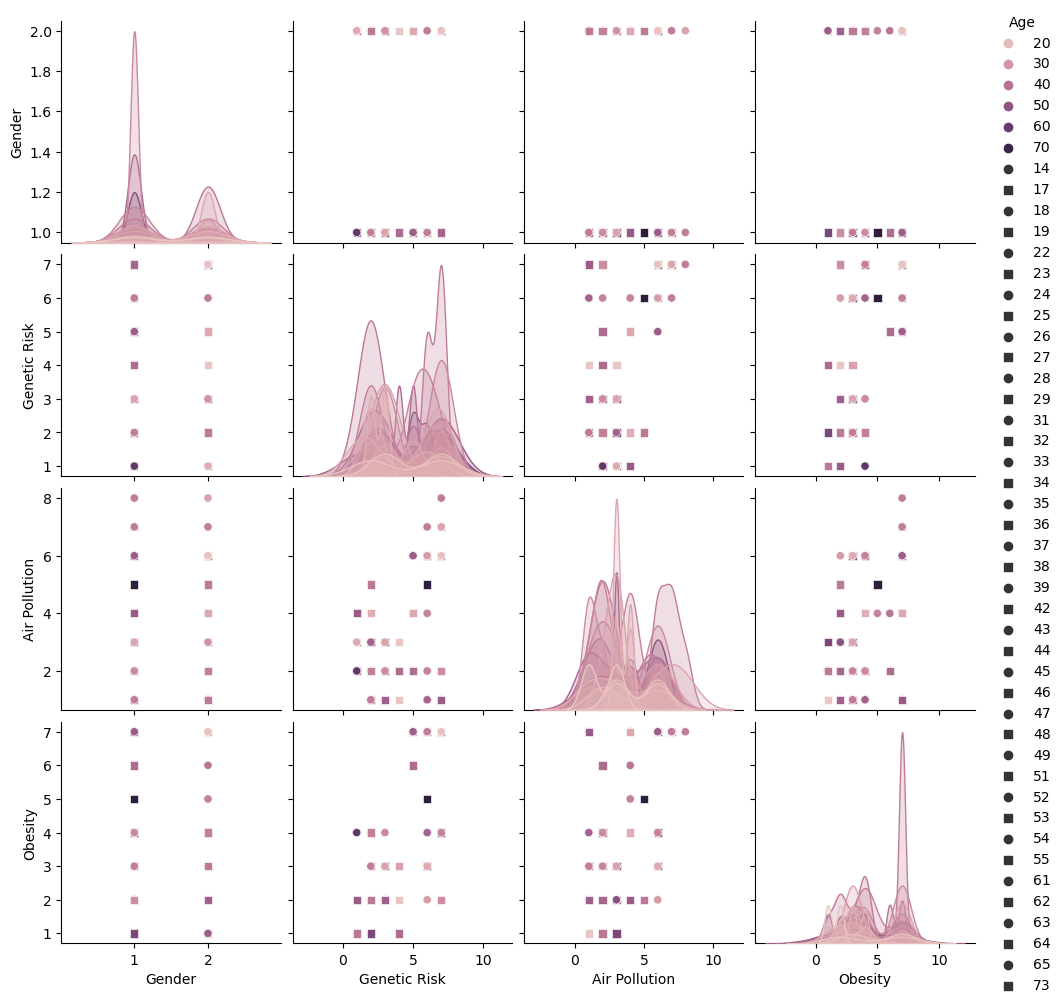

In [9]:
# Let us make a pairplot to show some correlations, but we won't use all at the same time
# as the dataset is large, but we can focus on different chosen factors easily
sns.pairplot(data, vars = ['Gender', 'Genetic Risk', 'Air Pollution', 'Obesity'], hue = "Age", markers = ["o", "s"]) 

<Axes: >

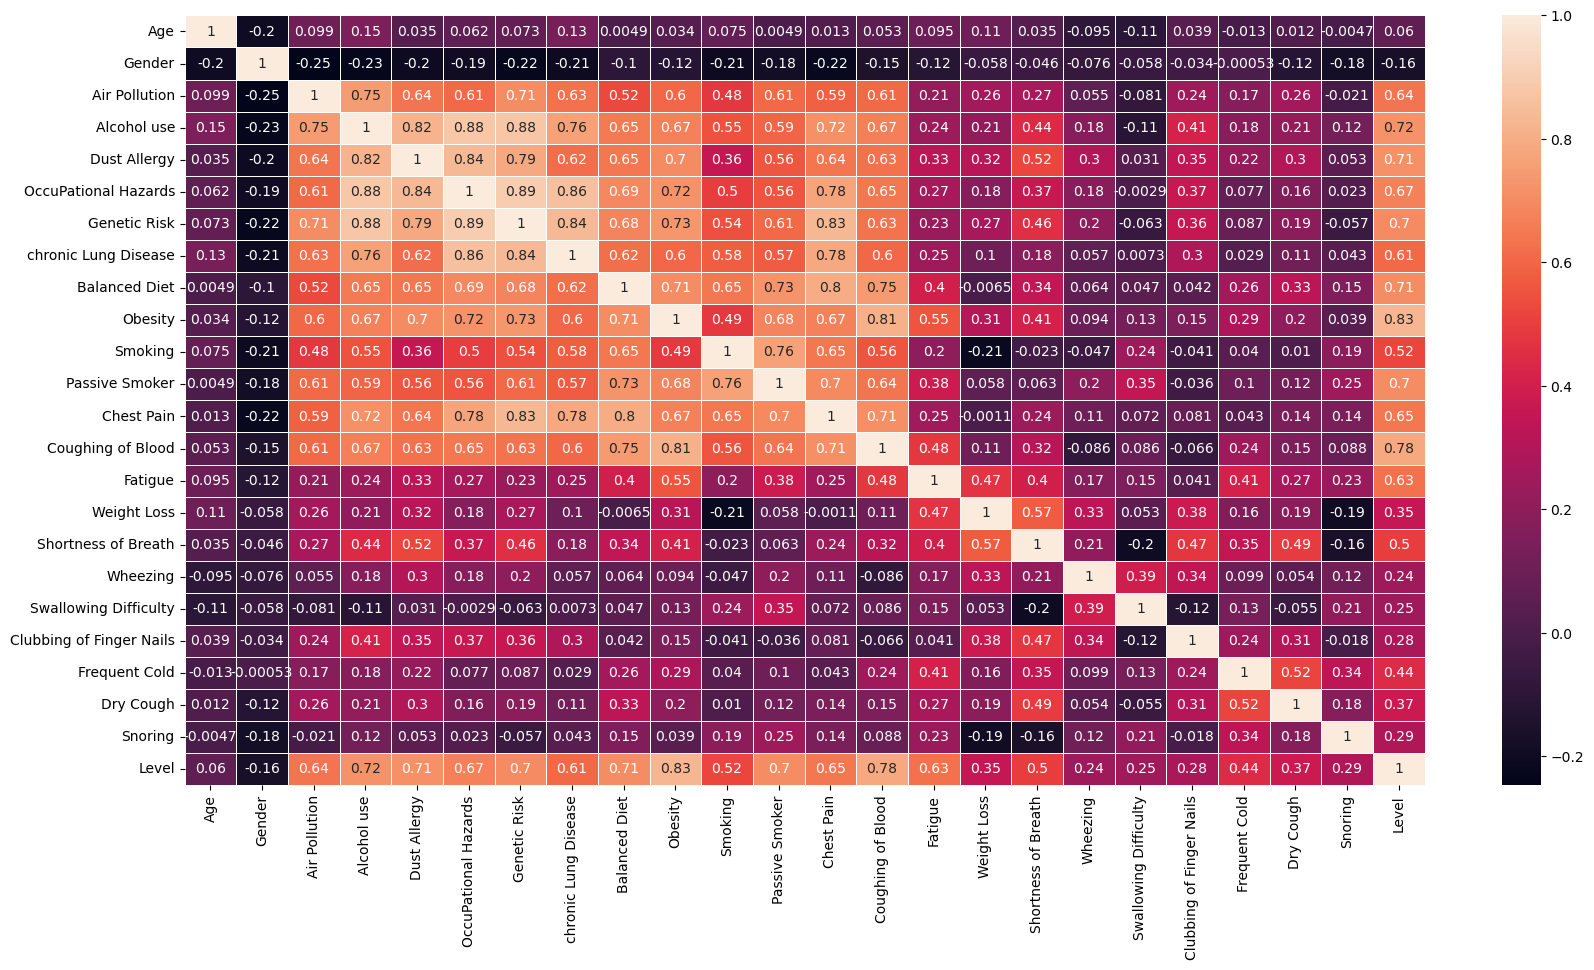

In [10]:
# Making a heatmap is a much more reasonable way to look at all of the data 

plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, linewidth = .5)


### Next, we want to split our datset and make a training model

In [11]:
# we will use this as our new variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
# we will make the test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [13]:
# Let us fit the model

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# print the training set
X_train

array([[ 0.52792358, -0.80169226,  1.09399803, ...,  0.27507437,
         0.57647857,  0.05849897],
       [-0.37626628, -0.80169226, -0.40036467, ...,  1.3781295 ,
         0.57647857,  0.7367479 ],
       [ 1.43211345, -0.80169226, -0.40036467, ...,  0.27507437,
         0.57647857, -0.61974996],
       ...,
       [ 0.11692819, -0.80169226,  0.09775623, ...,  1.92965707,
         0.57647857,  2.09324575],
       [ 2.007507  , -0.80169226,  1.09399803, ..., -0.27645319,
         0.08004923, -0.61974996],
       [ 2.007507  , -0.80169226,  1.09399803, ..., -0.27645319,
         0.08004923, -0.61974996]])

In [15]:
# print the test set
X_test

array([[-1.03385891,  1.24736143, -0.40036467, ..., -0.27645319,
         0.08004923,  0.05849897],
       [-0.45846536, -0.80169226,  1.09399803, ..., -0.27645319,
         0.08004923, -0.61974996],
       [-0.7050626 ,  1.24736143,  0.09775623, ...,  1.3781295 ,
         1.56933725, -0.61974996],
       ...,
       [ 0.77452082, -0.80169226,  1.09399803, ...,  1.3781295 ,
         1.56933725, -0.61974996],
       [ 2.17190516, -0.80169226,  1.09399803, ..., -0.27645319,
        -1.40923879,  0.7367479 ],
       [ 0.03472911,  1.24736143, -0.40036467, ...,  0.82660194,
        -1.40923879, -1.29799888]])

## We will look at the accuracy score of the Logistic Regression function and look at a confusion matrix

In [16]:
# Let us fit it to the Logistic Regression function

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Let us make predictions

y_predictions = clf.predict(X_test)

In [18]:
# Now we can make a confusion matrix and get an accuracy score 

matrix = confusion_matrix(y_test, y_predictions)
print(matrix)
accuracy_score(y_test, y_predictions)

[[57  0  0]
 [ 0 53  0]
 [ 0  0 90]]


1.0

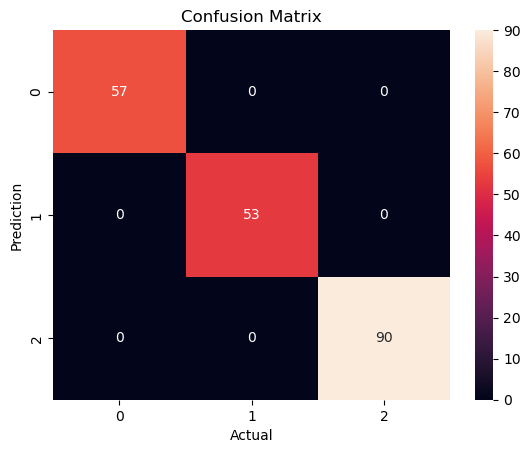

In [19]:
# We can visually represent the confusion matrix as well 
sns.heatmap(matrix, annot = True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Next, we will try the data in a RandomForestClassifier and see our confusion matrix and accuracy score

In [20]:
# Let us make a random forest classifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Let us make the predictions
y_predictions = rfc.predict(X_test)

In [22]:
rfc_matrix = confusion_matrix(y_test, y_predictions)
print(rfc_matrix)
accuracy_score(y_test, y_predictions)

[[57  0  0]
 [ 0 53  0]
 [ 0  0 90]]


1.0

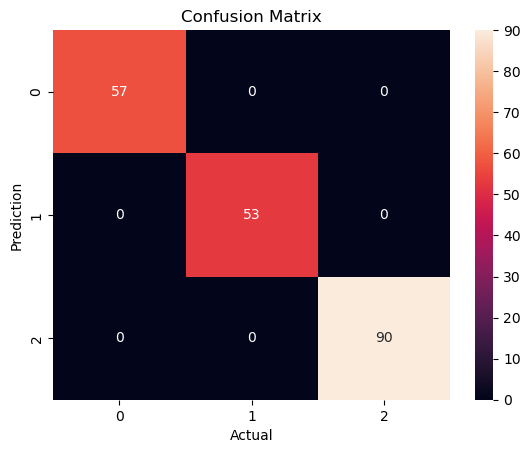

In [23]:
# We can visually represent the confusion matrix as well 
sns.heatmap(rfc_matrix, annot = True)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# In conclusion, both models seem like they will be able to accurately predict lung cancer based on this dataset. We could remove other variables that would be key indicators to make it seemingly harder to detect or determine detection amongst the levels with different variables. You could also use images in another study for detection. 